In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('xscaled.csv')

In [3]:
X = df.drop("fetal_health", axis = 1)
y = df.fetal_health

In [4]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352782,-0.823776,-0.203392,-1.492245,-0.641203,-0.057653,-0.26964,1.514300,-0.944425,1.811237,...,-0.167577,-1.067985,-2.123628,-0.703885,-0.460150,-1.064409,0.153804,-1.180575,1.863218,1.115505
1,-0.132665,0.726444,-0.203392,0.548605,0.370643,-0.057653,-0.26964,-1.746497,0.865205,-0.534294,...,1.524797,-0.864976,1.889542,0.651603,0.953071,0.216224,0.089729,0.131985,-0.237919,-0.521344
2,-0.030989,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,0.865205,-0.534294,...,1.524797,-0.864976,1.889542,0.312731,0.953071,0.216224,0.025654,-0.006179,-0.203474,-0.521344
3,0.070687,-0.048666,-0.203392,1.228888,0.370643,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,...,1.191450,-1.372500,0.328865,2.345964,-0.460150,-0.027706,-0.038421,-0.075261,-0.203474,1.115505
4,-0.132665,0.984814,-0.203392,1.228888,-0.641203,-0.057653,-0.26964,-1.804726,1.204511,-0.534294,...,1.191450,-1.372500,0.328865,1.668219,-0.460150,-0.027706,0.089729,-0.006179,-0.272364,1.115505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0.680746,-0.823776,-0.203392,0.888747,-0.641203,-0.057653,-0.26964,1.863671,-1.283731,0.829387,...,-0.782986,1.469633,0.719034,-0.026141,-0.460150,0.948014,0.986778,0.960970,-0.582368,-0.521344
2109,0.680746,-0.565406,-0.203392,0.888747,-0.641203,-0.057653,-0.26964,1.805442,-1.057527,0.665745,...,-0.116293,0.319246,0.273126,0.651603,-0.460150,0.887031,0.858628,0.891888,-0.547923,1.115505
2110,0.680746,-0.565406,-0.203392,0.888747,-0.641203,-0.057653,-0.26964,1.863671,-1.057527,0.556650,...,-0.090651,0.319246,0.328865,0.312731,-0.460150,0.948014,0.858628,0.960970,-0.513478,1.115505
2111,0.680746,-0.565406,-0.203392,0.548605,-0.641203,-0.057653,-0.26964,1.805442,-1.057527,0.938481,...,-0.116293,0.319246,0.273126,0.651603,-0.460150,0.887031,0.794553,0.891888,-0.513478,1.115505


In [5]:
vars_all = ['prolongued_decelerations', 'abnormal_short_term_variability', \
      'percentage_of_time_with_abnormal_long_term_variability', \
      'histogram_mean', 'histogram_mode', 'histogram_median', 'accelerations', \
      'histogram_variance', 'baseline value', 'mean_value_of_short_term_variability', \
      'uterine_contractions', 'histogram_min', 'mean_value_of_long_term_variability', \
      'light_decelerations', 'histogram_width']

X_5_ = X[vars_all[:5]].copy()

X_10_ = X[vars_all[:10]].copy()

X_15_ = X[vars_all].copy()

# 5 melhores features

In [6]:
smt = SMOTE(random_state=2)
X_5, y_5 = smt.fit_resample(X_5_, y)
print(np.bincount(y_5))
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, random_state=1, stratify=y_5)
lr5 = LogisticRegression(random_state=2)
lr5.fit(X_5_train, y_5_train)
y_5_pred = lr5.predict(X_5_test)
pd.DataFrame(classification_report(y_5_test, y_5_pred, output_dict=True)).T

[   0 1646 1646 1646]


,precision,recall,f1-score,support
1.0,0.835784,0.829684,0.832723,411.000000
2.0,0.744472,0.735437,0.739927,412.000000
3.0,0.830952,0.847087,0.838942,412.000000
accuracy,0.804049,0.804049,0.804049,0.804049
macro avg,0.803736,0.804069,0.803864,1235.000000
weighted avg,0.803710,0.804049,0.803841,1235.000000


In [13]:
accuracy_score(y_5_test, y_5_pred)

0.8040485829959514

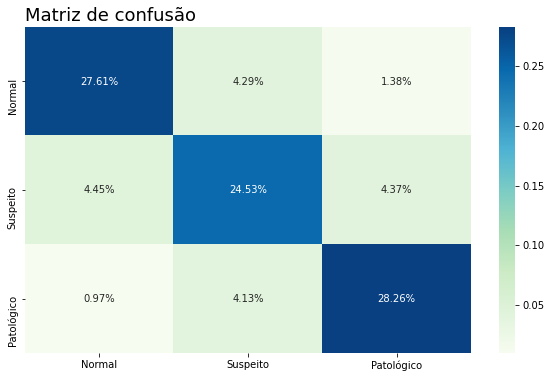

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Matriz de confusão', loc='left', fontsize=18)
cf_matrix = confusion_matrix(y_5_test, y_5_pred)
categories = ['Normal', 'Suspeito', 'Patológico']
sns.heatmap(cf_matrix/np.sum(cf_matrix), xticklabels=categories,yticklabels=categories, annot=True,fmt='.2%', cmap='GnBu')

# 10 melhores features

In [8]:
smt = SMOTE(random_state=2)
X_10, y_10 = smt.fit_resample(X_10_, y)
X_10_train, X_10_test, y_10_train, y_10_test = train_test_split(X_10, y_10, random_state=1, stratify=y_10)
lr10 = LogisticRegression(random_state=2)
lr10.fit(X_10_train, y_10_train)
y_10_pred = lr10.predict(X_10_test)
pd.DataFrame(classification_report(y_10_test, y_10_pred, output_dict=True)).T

,precision,recall,f1-score,support
1.0,0.935484,0.846715,0.888889,411.0000
2.0,0.788506,0.832524,0.809917,412.0000
3.0,0.862150,0.895631,0.878571,412.0000
accuracy,0.858300,0.858300,0.858300,0.8583
macro avg,0.862046,0.858290,0.859126,1235.0000
weighted avg,0.861987,0.858300,0.859102,1235.0000


In [14]:
accuracy_score(y_10_test, y_10_pred)

0.8582995951417004

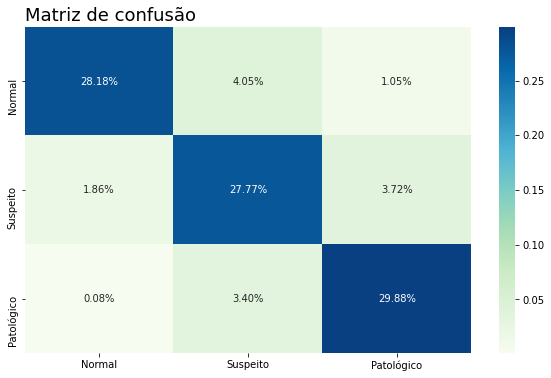

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Matriz de confusão', loc='left', fontsize=18)
cf_matrix = confusion_matrix(y_10_test, y_10_pred)
categories = ['Normal', 'Suspeito', 'Patológico']
sns.heatmap(cf_matrix/np.sum(cf_matrix), xticklabels=categories,yticklabels=categories, annot=True,fmt='.2%', cmap='GnBu')

# 15 melhores features

In [11]:
smt = SMOTE(random_state=2)
X_15, y_15 = smt.fit_resample(X_15_, y)
X_15_train, X_15_test, y_15_train, y_15_test = train_test_split(X_15, y_15, random_state=1, stratify=y_15)
lr15 = LogisticRegression(random_state=2, max_iter=150)
lr15.fit(X_15_train, y_15_train)
y_15_pred = lr15.predict(X_15_test)
pd.DataFrame(classification_report(y_15_test, y_15_pred, output_dict=True)).T

4938


,precision,recall,f1-score,support
1.0,0.969101,0.839416,0.899609,411.000000
2.0,0.800443,0.876214,0.836616,412.000000
3.0,0.871495,0.905340,0.888095,412.000000
accuracy,0.873684,0.873684,0.873684,0.873684
macro avg,0.880347,0.873656,0.874774,1235.000000
weighted avg,0.880275,0.873684,0.874753,1235.000000


<AxesSubplot:title={'left':'Matriz de confusão'}>

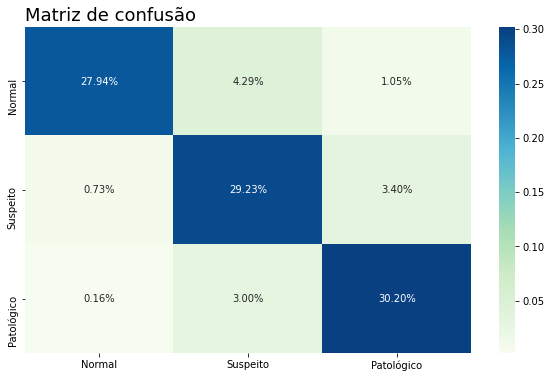

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Matriz de confusão', loc='left', fontsize=18)
cf_matrix = confusion_matrix(y_15_test, y_15_pred)
categories = ['Normal', 'Suspeito', 'Patológico']
sns.heatmap(cf_matrix/np.sum(cf_matrix), xticklabels=categories,yticklabels=categories, annot=True,fmt='.2%', cmap='GnBu')